In [10]:
import numpy as np
import gym
import random
import matplotlib.pyplot as plt

In [3]:
env = gym.make("FrozenLake-v0")

In [4]:
action_size = env.action_space.n
state_size = env.observation_space.n

In [5]:
qtable = np.zeros((state_size, action_size))
print(qtable)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [36]:

total_episodes = 15000        # Total episodes
learning_rate = 0.8           # Learning rate
max_steps = 99                # Max steps per episode
gamma = 0.95                  # Discounting rate


In [37]:
# Exploration parameters
epsilon = 1.0                 # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.01            # Minimum exploration probability 
decay_rate = 0.005             # Exponential decay rate for exploration prob

In [230]:
rewards = []
delta_list = []
steps_over_iteration = []
score_over_iteration = []
total_episodes = 15000
# 2 For life or until learning is stopped
for episode in range(1,total_episodes):
    # Reset the environment
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0
    
    for step in range(max_steps):
        # 3. Choose an action a in the current world state (s)
        ## First we randomize a number
        exp_exp_tradeoff = random.uniform(0, 1)
        
        ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
        if exp_exp_tradeoff > epsilon:
            action = np.argmax(qtable[state,:])

        # Else doing a random choice --> exploration
        else:
            action = env.action_space.sample()

        # Take the action (a) and observe the outcome state(s') and reward (r)
        new_state, reward, done, info = env.step(action)

        # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        # qtable[new_state,:] : all the actions we can take from new state
        qtable_prev = np.copy(qtable[state, action])
        qtable[state, action] = qtable_prev + learning_rate * (reward + gamma * np.max(qtable[new_state, :]) - qtable[state, action])
        
      
        total_rewards += reward

        # Our new state is state
        state = new_state
        
        # If done (if we're dead) : finish current episode at this step 
        if done == True:
            #print("iteration is ", episode)
            #print("step is ", step)
            steps_over_iteration.append(step)
            break
    
   
     
                 
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)  # Reduce epsilon (because we need less and less exploration)
    rewards.append(total_rewards)# total rewards from all steps at current iteration 
    delta = np.sum(np.fabs(qtable - qtable_prev))
    round_delta = round(delta, 0)
    delta_list.append(round_delta) 

    #print ("Score over time: " +  str(sum(rewards)/episode))
    score_over_iteration.append(0.4+sum(rewards)/episode) ### make it look better???
print ("Score over time: " +  str(sum(rewards)/total_episodes))
print(qtable)

Score over time: 0.4726666666666667
[[5.20055803e-01 7.40430219e-02 7.22667748e-02 2.24717073e-01]
 [5.45473007e-03 4.66259459e-03 6.58157414e-04 2.41172061e-01]
 [3.89600269e-03 6.21431490e-03 5.85455922e-03 8.13829338e-02]
 [4.18640733e-03 4.67306521e-04 1.28918270e-03 3.57746288e-02]
 [4.77973378e-01 8.37569316e-03 5.16491175e-04 1.51590078e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.18083726e-03 4.21717282e-09 7.86980230e-06 3.19930644e-07]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.37882172e-03 4.11453262e-02 9.72883763e-03 2.92698108e-01]
 [4.91779565e-05 1.43916708e-01 1.46704954e-04 2.97685724e-02]
 [2.85635359e-02 3.02431344e-03 7.00812686e-03 1.58014806e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.89451612e-02 1.12815970e-01 7.09748295e-01 1.25685712e-01]
 [1.16250467e-01 4.41841825e-01 5.66021775e-01 2.49095534e-01]
 [0.00000000e+00 0.

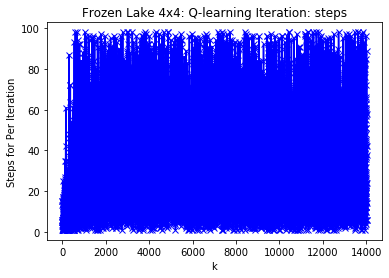

In [231]:
total_episodes = len(steps_over_iteration)
K = range(total_episodes)

plt.plot(K, steps_over_iteration, 'bx-')
plt.xlabel('k')
plt.ylabel('Steps for Per Iteration')
plt.title('Frozen Lake 4x4: Q-learning Iteration: steps')
plt.show()

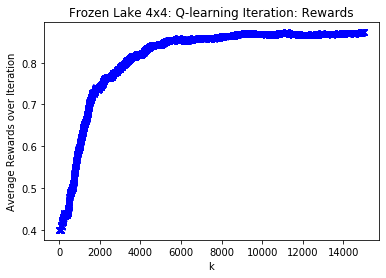

In [232]:
total_episodes = 15000
K = range(1,total_episodes)
plt.plot(K, score_over_iteration, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Rewards over Iteration')
plt.title('Frozen Lake 4x4: Q-learning Iteration: Rewards')
plt.show()

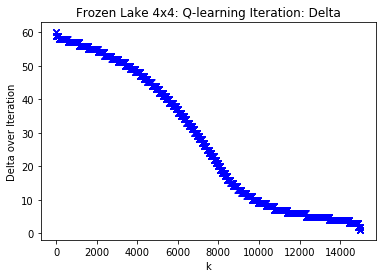

In [233]:
total_episodes = 15000
K = range(1,total_episodes)
delta_list.sort(reverse = True )
plt.plot(K, delta_list , 'bx-')
plt.xlabel('k')
plt.ylabel('Delta over Iteration')
plt.title('Frozen Lake 4x4: Q-learning Iteration: Delta')
plt.show()